# Speech Emotion Recognition using Machine Learning
## Introduction

This project focuses on Speech Emotion Recognition (SER), a technique used to identify and classify human emotions from speech signals. Emotion-aware systems play a crucial role in improving human–computer interaction, virtual assistants, customer support systems, and mental health monitoring.

The project uses the RAVDESS (Ryerson Audio-Visual Database of Emotional Speech and Song) dataset, which consists of high-quality, professionally acted audio recordings covering eight distinct emotional states. By applying supervised machine learning techniques, meaningful acoustic features are extracted from speech signals and used to train classification models capable of accurately recognizing emotions from spoken audio.


## Support Vector Machine (SVM)

Access is denied.
Access is denied.


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy of SVM: 96.35%

Classification Report:
              precision    recall  f1-score   support

    Actor_01       1.00      1.00      1.00        24
    Actor_02       0.92      1.00      0.96        24
    Actor_03       1.00      0.96      0.98        24
    Actor_04       0.96      1.00      0.98        24
    Actor_05       0.92      1.00      0.96        24
    Actor_06       0.96      0.92      0.94        24
    Actor_07       0.95      0.83      0.89        24
    Actor_08       0.96      1.00      0.98        24
    Actor_09       1.00      0.96      0.98        24
    Actor_10       0.96      1.00      0.98        24
    Actor_11       1.00      0.96      0.98        24
    Actor_12       1.00      0.96      0.98        24
    Actor_13       0.96      0.96      0.96        24
    Actor_14       0.92      0.96      0.94        24
    Actor_15       0.96      1.00      0.98        24
    Actor_16      

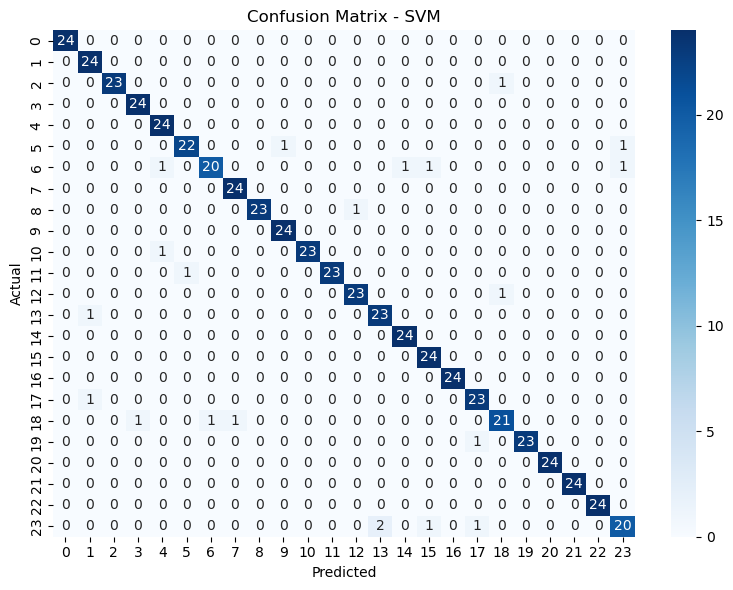

In [1]:
!pip install librosa numpy soundfile scikit-learn 
!pip install praat-parselmouth

# Importing required Python libraries
import os
import numpy as np
import librosa
import soundfile as sf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import parselmouth
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Writing a function to extract features from an audio file
def extract_features(file_path):
    try:
        audio, sample_rate = sf.read(file_path)
        if len(audio.shape) > 1:
            audio = audio[:, 0]
        audio = audio.astype(float)

        # MFCC
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_mean = np.mean(mfccs.T, axis=0)

        # ZCR
        zcr = librosa.feature.zero_crossing_rate(y=audio)
        zcr_mean = np.mean(zcr.T, axis=0)

        # Chroma
        stft = np.abs(librosa.stft(audio))
        chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
        chroma_mean = np.mean(chroma.T, axis=0)

        # Spectral Contrast
        contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)
        contrast_mean = np.mean(contrast.T, axis=0)

        # HNR
        try:
            snd = parselmouth.Sound(file_path)
            hnr = snd.to_harmonicity()
            hnr_values = hnr.values[hnr.values != -200]
            hnr_mean = np.mean(hnr_values) if hnr_values.size > 0 else 0
        except:
            hnr_mean = 0

        # Combining all features
        combined = np.hstack([
            mfccs_mean,
            zcr_mean,
            chroma_mean,
            contrast_mean,
            [hnr_mean]
        ])
        return combined

    except Exception as e:
        print("Error extracting:", file_path, "→", e)
        return None
    
dataset_path = r"C:\Users\Lenovo\Downloads\archive"    # Dataset Path
X_features = []
y_labels = []

#  Looping through all actor folders and WAV files
for emotion_label in os.listdir(dataset_path):
    emotion_folder = os.path.join(dataset_path, emotion_label)
    if os.path.isdir(emotion_folder):
        for file_name in os.listdir(emotion_folder):
            if file_name.endswith(".wav"):
                file_path = os.path.join(emotion_folder, file_name)
                features = extract_features(file_path)
                if features is not None:
                    X_features.append(features)
                    y_labels.append(emotion_label)

# Converting the lists to NumPy arrays for model processing                    
X_features = np.array(X_features)
y_labels = np.array(y_labels)

#  Scale features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Splitting data into training and testing sets (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_labels, test_size=0.4, random_state=42, stratify=y_labels
)

# Defining hyperparameter grid 
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Using GridSearchCV for finding best parameters
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)


# Printing best parameters
print("Best Parameters:", grid.best_params_)

# Using the best model for predictions
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluating model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of SVM: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Random Forest

 Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
 Test Accuracy (Random Forest): 88.89%

 Classification Report:
              precision    recall  f1-score   support

    Actor_01       0.84      0.88      0.86        24
    Actor_02       0.88      0.88      0.88        24
    Actor_03       0.85      0.92      0.88        24
    Actor_04       0.77      0.96      0.85        24
    Actor_05       0.84      0.88      0.86        24
    Actor_06       0.81      0.88      0.84        24
    Actor_07       1.00      0.71      0.83        24
    Actor_08       0.89      1.00      0.94        24
    Actor_09       1.00      0.88      0.93        24
    Actor_10       1.00      0.96      0.98        24
    Actor_11       0.96      1.00      0.98        24
    Actor_12       0.95      0.83      0.89        24
    Actor_13       1.00      0.83      0.91        24
    Actor_14       0.81      0.88      0.84        24
    Actor_15       1.00      1.00      1.0

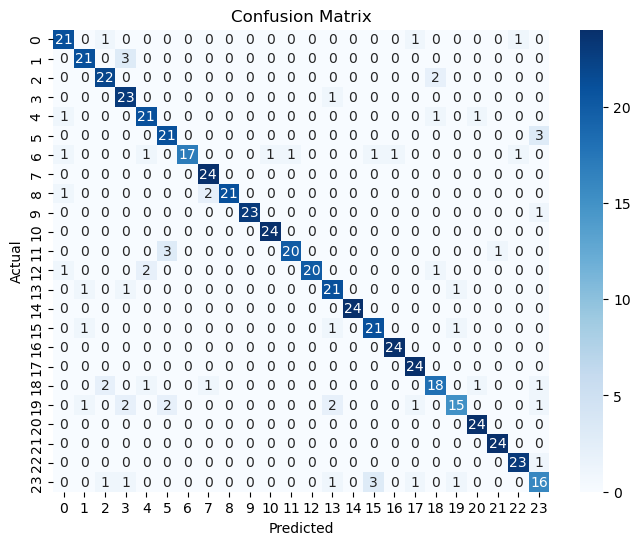

In [2]:
# Importing required Python libraries
import os
import numpy as np
import librosa
import soundfile as sf
import parselmouth
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Writing Function for Feature Extraction
def extract_features(file_path):
    try:
        audio, sample_rate = sf.read(file_path)
        if len(audio.shape) > 1:
            audio = audio[:, 0]
        audio = audio.astype(float)
         
        # MFCC
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_mean = np.mean(mfccs.T, axis=0)

        # ZCR
        zcr = librosa.feature.zero_crossing_rate(y=audio)
        zcr_mean = np.mean(zcr.T, axis=0)

        #Chroma
        stft = np.abs(librosa.stft(audio))
        chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
        chroma_mean = np.mean(chroma.T, axis=0)

        # Spectral Contrast
        contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)
        contrast_mean = np.mean(contrast.T, axis=0)

        # HNR
        try:
            snd = parselmouth.Sound(file_path)
            hnr = snd.to_harmonicity()
            hnr_values = hnr.values[hnr.values != -200]
            hnr_mean = np.mean(hnr_values) if hnr_values.size > 0 else 0
        except:
            hnr_mean = 0

        # Combing all features
        combined = np.hstack([
            mfccs_mean,
            zcr_mean,
            chroma_mean,
            contrast_mean,
            [hnr_mean]
        ])
        return combined
    except Exception as e:
        print("Error extracting:", file_path, "→", e)
        return None

# Dataset Path
dataset_path = r"C:\Users\Lenovo\Downloads\archive"
X_features = []
y_labels = []

#  Looping through all actor folders and WAV files
for emotion_label in os.listdir(dataset_path):
    emotion_folder = os.path.join(dataset_path, emotion_label)
    if os.path.isdir(emotion_folder):
        for file_name in os.listdir(emotion_folder):
            if file_name.endswith(".wav"):
                file_path = os.path.join(emotion_folder, file_name)
                features = extract_features(file_path)
                if features is not None:
                    X_features.append(features)
                    y_labels.append(emotion_label)

# Preprocessing
X = np.array(X_features)
y = np.array(y_labels)

# Scale features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=42, stratify=y
)

# Defining hyperparameter grid 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Using GridSearchCV for finding best parameters
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Printing Best Parameters
print(" Best Parameters:", grid.best_params_)

# Using the best model for predictions
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluating model
accuracy = accuracy_score(y_test, y_pred)
print(f" Test Accuracy (Random Forest): {accuracy * 100:.2f}%")

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## k-nearest neighbor algorithm

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Test Accuracy (KNN + GridSearch): 84.72%

 Classification Report:
              precision    recall  f1-score   support

    Actor_01       1.00      0.92      0.96        24
    Actor_02       0.79      0.96      0.87        24
    Actor_03       1.00      0.83      0.91        24
    Actor_04       0.81      0.88      0.84        24
    Actor_05       0.84      0.88      0.86        24
    Actor_06       0.80      0.67      0.73        24
    Actor_07       1.00      0.54      0.70        24
    Actor_08       0.89      1.00      0.94        24
    Actor_09       1.00      0.83      0.91        24
    Actor_10       0.84      0.88      0.86        24
    Actor_11       0.77      0.83      0.80        24
    Actor_12       0.75      0.75      0.75        24
    Actor_13       0.88      0.88      0.88        24
    Actor_14       0.80      0.83      0.82        24
    Actor_15       1.00      0.96      0.

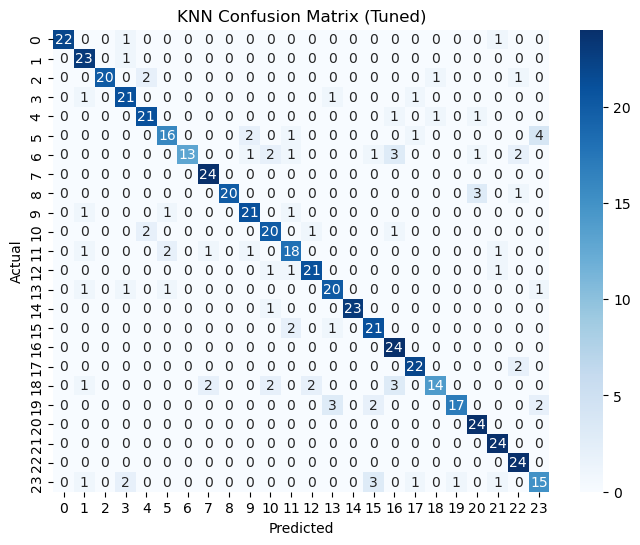

In [3]:
# Importing required Python libraries
import os
import numpy as np
import librosa
import soundfile as sf
import parselmouth
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Fix joblib / CPU core warning
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# Suppress sklearn / joblib warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Writing Function for Feature Extraction
def extract_features(file_path):
    try:
        audio, sample_rate = sf.read(file_path)
        if len(audio.shape) > 1:
            audio = audio[:, 0]
        audio = audio.astype(float)
        
        # MFCC
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_mean = np.mean(mfccs.T, axis=0)

        #ZCR
        zcr = librosa.feature.zero_crossing_rate(y=audio)
        zcr_mean = np.mean(zcr.T, axis=0)

        #Chroma
        stft = np.abs(librosa.stft(audio))
        chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
        chroma_mean = np.mean(chroma.T, axis=0)

        # Spectral Contrast
        contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)
        contrast_mean = np.mean(contrast.T, axis=0)

        #HNR
        try:
            snd = parselmouth.Sound(file_path)
            hnr = snd.to_harmonicity()
            hnr_values = hnr.values[hnr.values != -200]
            hnr_mean = np.mean(hnr_values) if hnr_values.size > 0 else 0
        except:
            hnr_mean = 0
            
        # Combing all features together
        combined = np.hstack([
            mfccs_mean,
            zcr_mean,
            chroma_mean,
            contrast_mean,
            [hnr_mean]
        ])
        return combined
    except Exception as e:
        print("Error extracting:", file_path, "→", e)
        return None


# Dataset Path
dataset_path = r"C:\Users\Lenovo\Downloads\archive"
X_features = []
y_labels = []


#  Looping through all actor folders and WAV files
for emotion_label in os.listdir(dataset_path):
    emotion_folder = os.path.join(dataset_path, emotion_label)
    if os.path.isdir(emotion_folder):
        for file_name in os.listdir(emotion_folder):
            if file_name.endswith(".wav"):
                file_path = os.path.join(emotion_folder, file_name)
                features = extract_features(file_path)
                if features is not None:
                    X_features.append(features)
                    y_labels.append(emotion_label)

# Preprocessing
X = np.array(X_features)
y = np.array(y_labels)


# Scale features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=42, stratify=y
)

# Defining hyperparameter grid 
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Using GridSearchCV for finding best parameters
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Printing Best Parameters
print("Best Parameters:", grid.best_params_)

# Using the best model for predictions
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluating model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (KNN + GridSearch): {accuracy * 100:.2f}%")

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In this project, I have applied Ensemble Learning techniques to improve the model's accuracy and robustness. By combining multiple classifiers, the ensemble approach helps in better generalization and performance compared to using a single model.

Ensemble methods help reduce overfitting and boost prediction accuracy by combining the strengths of different models.

 Ensemble Test Accuracy (Hard Voting): 92.71%

 Ensemble Classification Report:
              precision    recall  f1-score   support

    Actor_01       0.96      1.00      0.98        24
    Actor_02       0.85      0.96      0.90        24
    Actor_03       0.88      0.92      0.90        24
    Actor_04       0.85      0.96      0.90        24
    Actor_05       0.88      0.96      0.92        24
    Actor_06       0.88      0.88      0.88        24
    Actor_07       1.00      0.75      0.86        24
    Actor_08       0.96      1.00      0.98        24
    Actor_09       1.00      0.96      0.98        24
    Actor_10       1.00      0.96      0.98        24
    Actor_11       0.92      1.00      0.96        24
    Actor_12       0.95      0.88      0.91        24
    Actor_13       1.00      0.88      0.93        24
    Actor_14       0.88      0.96      0.92        24
    Actor_15       1.00      1.00      1.00        24
    Actor_16       0.82      0.96      0.88        24
 

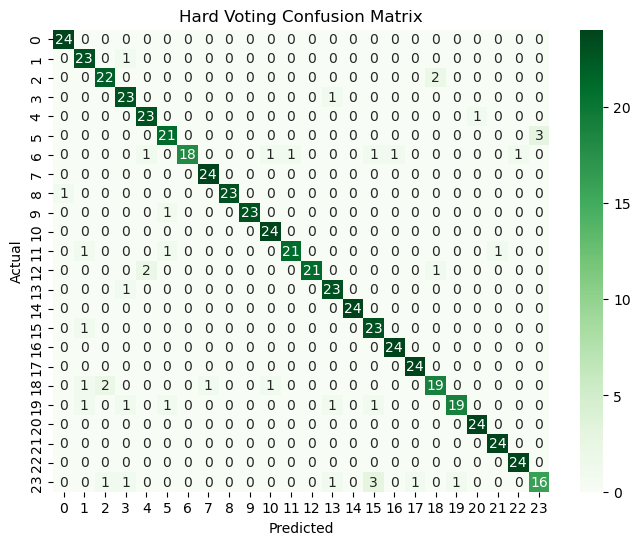

In [4]:
# Importing required Python libraries For Ensemble Learning
from sklearn.ensemble import VotingClassifier

# Creating the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('svm', best_model),        # from SVM GridSearch
        ('rf', best_rf),            # from Random Forest GridSearch
        ('knn', best_knn)           # from KNN GridSearch
    ],
    voting='hard'  # Hard Voting
)

# Fit the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predictions & Evaluation
y_pred_ensemble = voting_clf.predict(X_test)

#  Accuracy Checking
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
ensemble_acc = accuracy_score(y_test, y_pred_ensemble)
print(f" Ensemble Test Accuracy (Hard Voting): {ensemble_acc * 100:.2f}%")

# Detailed Report for Ensemble Learning
print("\n Ensemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Plotting Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt='d', cmap='Greens')
plt.title("Hard Voting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Evaluating Model Performance Using Cross-Validation
To assess the performance and generalizability of the ensemble model (voting_clf), 5-fold cross-validation is performed using cross_val_score from sklearn.model_selection.

In [5]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(voting_clf, X, y, cv=5)
print(f"Cross-validated accuracy: {cv_scores.mean() * 100:.2f}% ± {cv_scores.std() * 100:.2f}%")

Cross-validated accuracy: 83.26% ± 5.82%


In [6]:
print(classification_report(y_test, y_pred_ensemble))

              precision    recall  f1-score   support

    Actor_01       0.96      1.00      0.98        24
    Actor_02       0.85      0.96      0.90        24
    Actor_03       0.88      0.92      0.90        24
    Actor_04       0.85      0.96      0.90        24
    Actor_05       0.88      0.96      0.92        24
    Actor_06       0.88      0.88      0.88        24
    Actor_07       1.00      0.75      0.86        24
    Actor_08       0.96      1.00      0.98        24
    Actor_09       1.00      0.96      0.98        24
    Actor_10       1.00      0.96      0.98        24
    Actor_11       0.92      1.00      0.96        24
    Actor_12       0.95      0.88      0.91        24
    Actor_13       1.00      0.88      0.93        24
    Actor_14       0.88      0.96      0.92        24
    Actor_15       1.00      1.00      1.00        24
    Actor_16       0.82      0.96      0.88        24
    Actor_17       0.96      1.00      0.98        24
    Actor_18       0.96    

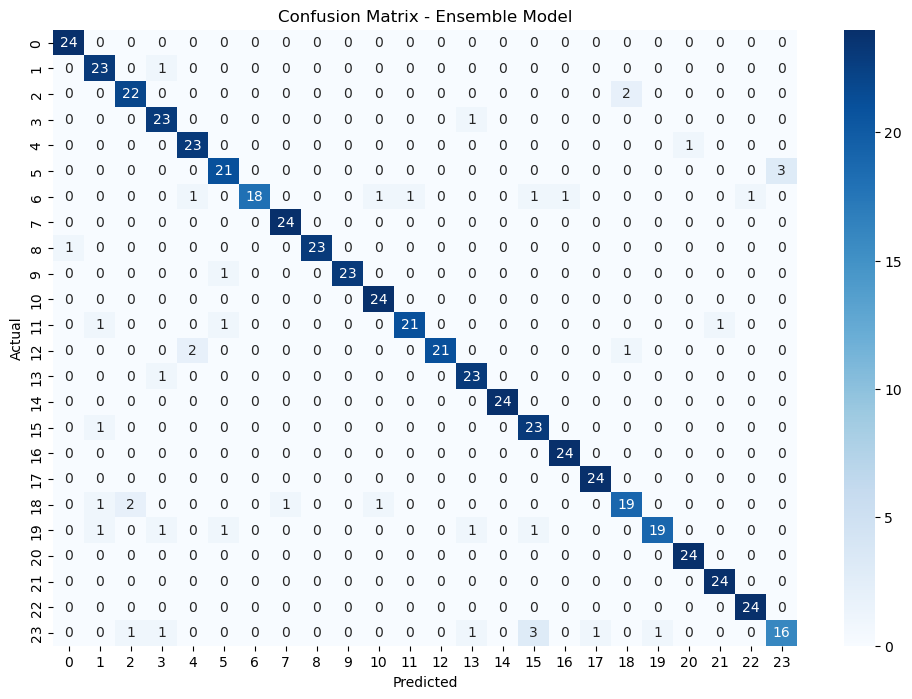

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating the confusion matrix from actual vs predicted labels
cm = confusion_matrix(y_test, y_pred_ensemble)

# Set figure size for better visibility
plt.figure(figsize=(12, 8))

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Ensemble Model')

# Display the heatmap
plt.show()